# 01_board_detect

_Minimal code + short comments. Load config → read first video frame → warp board → split 8×8 → preview & save._

In [1]:
# imports
import os, glob, cv2, numpy as np
import matplotlib.pyplot as plt
from Chess_Detection_Competition.utils import load_config, ensure_dir
from Chess_Detection_Competition.board import warp_board, split_grid
# display helper
def imshow_rgb(img, title=None, size=(6,6)):
    plt.figure(figsize=size)
    if img.ndim==2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if title: plt.title(title)
    plt.axis('off')


In [3]:
# 1) load config + pick first video (safe version)
from Chess_Detection_Competition.utils import _project_root

cfg = load_config()
ROOT = _project_root()
video_dir = ROOT / cfg["paths"]["videos_dir"]

videos = sorted(video_dir.glob("*.mp4"))
assert videos, f"No videos found in {video_dir}"

video_path = videos[0]
print("Using video:", video_path.name)

Using video: 2_Move_rotate_student.mp4


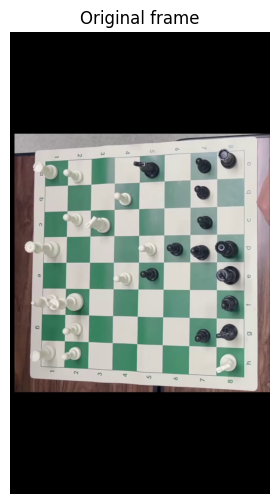

In [4]:
# 2) read the first frame
cap = cv2.VideoCapture(video_path)
ok, frame = cap.read()
cap.release()
assert ok, "Cannot read first frame"

imshow_rgb(frame, "Original frame", size=(6,6))


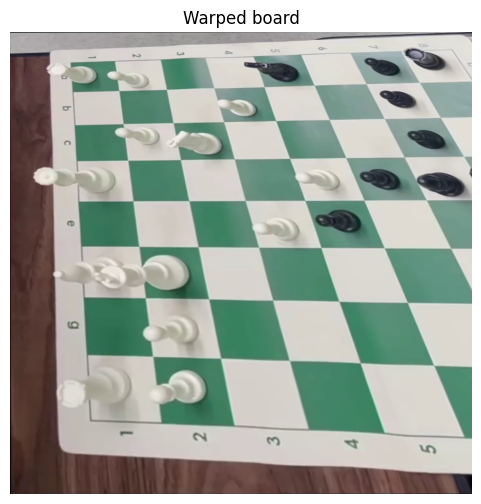

In [5]:
# 3) warp board (homography) → top-down square
warped, _ = warp_board(frame, cfg)
imshow_rgb(warped, "Warped board", size=(6,6))


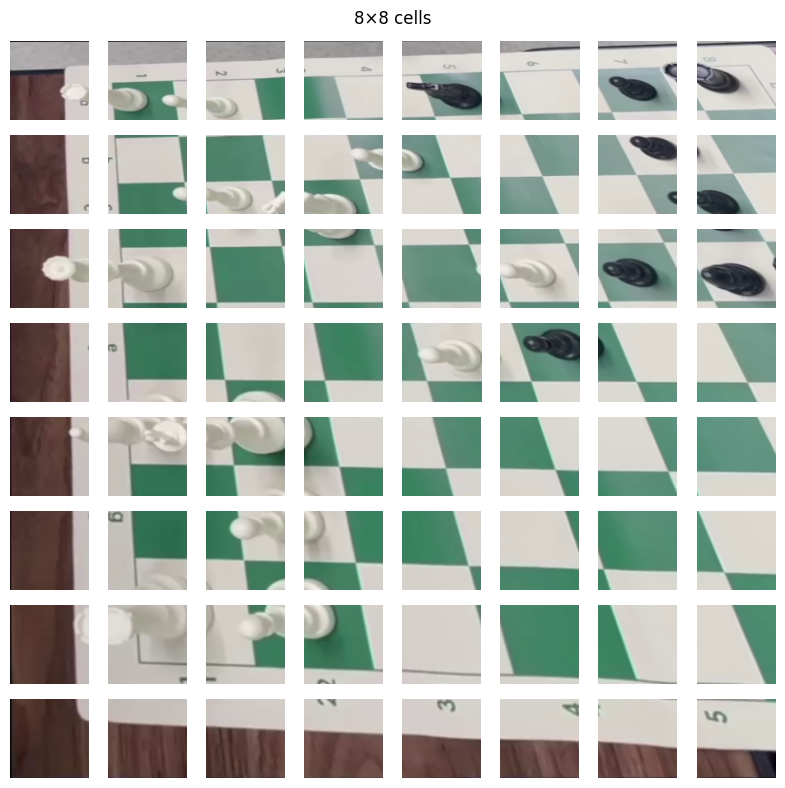

In [6]:
# 4) split into 8×8 cells and preview as a grid
cell_px = cfg["cells"]["img_size"]
cells = split_grid(warped, cell_px)

# show a compact 8x8 grid
fig, axes = plt.subplots(8,8, figsize=(8,8))
k = 0
for r in range(8):
    for c in range(8):
        _, patch = cells[k]; k+=1
        axes[r,c].imshow(cv2.cvtColor(patch, cv2.COLOR_BGR2RGB))
        axes[r,c].axis('off')
fig.suptitle("8×8 cells")
plt.tight_layout()


In [7]:
# 5) save debug images (optional)
ensure_dir("debug")
cv2.imwrite(os.path.join("debug","first_frame.jpg"), frame)
cv2.imwrite(os.path.join("debug","warped.jpg"), warped)
print("Saved to debug/first_frame.jpg and debug/warped.jpg")


Saved to debug/first_frame.jpg and debug/warped.jpg
